In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('E:/breast_cancer.csv', names=['Patient_Age', 'Year_of_Operation', 'Axil_Nodes_Found', 'Survival_Status'])
df.head()

,Patient_Age,Year_of_Operation,Axil_Nodes_Found,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [26]:
df.nunique()

Patient_Age          49
Year_of_Operation    12
Axil_Nodes_Found     31
Survival_Status       2
dtype: int64

In [3]:
# High-level
df.describe()

,Patient_Age,Year_of_Operation,Axil_Nodes_Found,Survival_Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Patient_Age        306 non-null    int64
 1   Year_of_Operation  306 non-null    int64
 2   Axil_Nodes_Found   306 non-null    int64
 3   Survival_Status    306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [5]:
df.shape

(306, 4)

In [6]:
# Dataset balance
# About 225 survived (lived 5 years or longer after operation) out of 306
df[df['Survival_Status'] == 1].shape[0]

225

In [7]:
# About 81 did not survive (lived less than 5 years after operation) out of 306
df[df['Survival_Status'] == 2].shape[0]

81

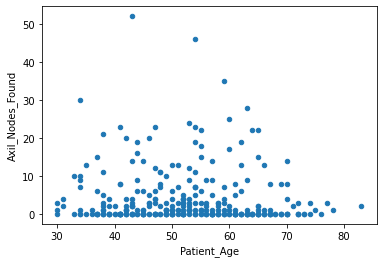

In [8]:
# BiVariant Analysis
# 2D Scatter plot
df.plot(y='Axil_Nodes_Found', x='Patient_Age',kind='scatter');
plt.show()

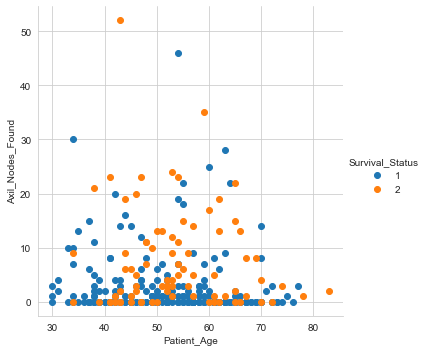

In [9]:
sns.set_style("whitegrid")

sns.FacetGrid(df,hue='Survival_Status',size=5) \
    .map(plt.scatter,'Patient_Age','Axil_Nodes_Found') \
    .add_legend()
plt.show()

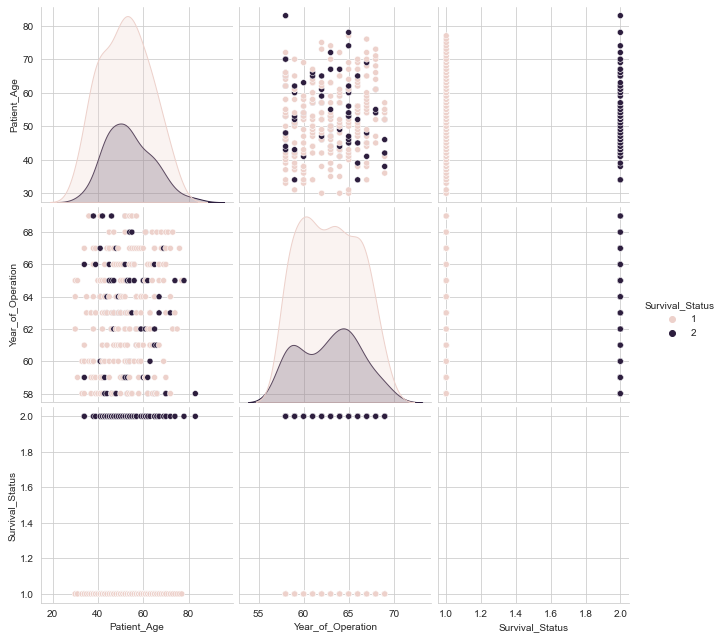

In [10]:
# Pair plot
sns.set_style("whitegrid");

sns.pairplot(df,hue='Survival_Status',size=3,vars=["Patient_Age", "Year_of_Operation","Survival_Status"])
plt.show()

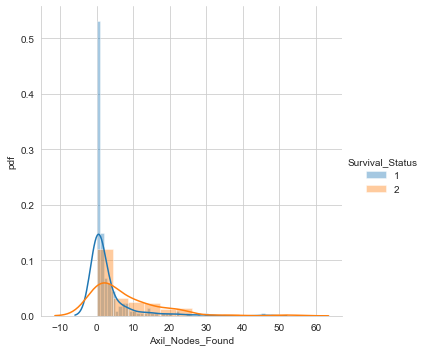

In [11]:
# Univariant Analysis
sns.FacetGrid(df, hue="Survival_Status", size=5) \
   .map(sns.distplot, "Axil_Nodes_Found") \
   .add_legend();
plt.ylabel('pdf')
plt.show();

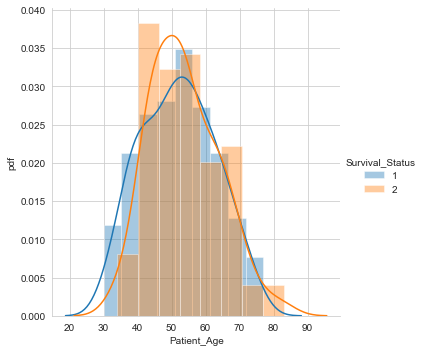

In [12]:
sns.FacetGrid(df, hue="Survival_Status", size=5) \
   .map(sns.distplot, "Patient_Age") \
   .add_legend();
plt.ylabel('pdf')
plt.show();

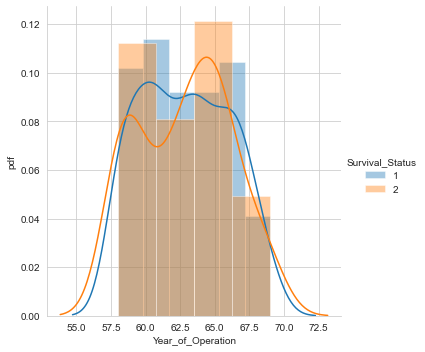

In [13]:
sns.FacetGrid(df, hue="Survival_Status", size=5) \
   .map(sns.distplot, "Year_of_Operation") \
   .add_legend();
plt.ylabel('pdf')
plt.show();

In [14]:
status_1 = df[df['Survival_Status'] == 1]
status_1.describe()

,Patient_Age,Year_of_Operation,Axil_Nodes_Found,Survival_Status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [15]:
status_2 = df[df['Survival_Status'] == 2]
status_2.describe()

,Patient_Age,Year_of_Operation,Axil_Nodes_Found,Survival_Status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


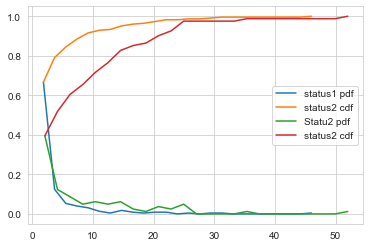

In [16]:
counts, bin_edges = np.histogram(status_1['Axil_Nodes_Found'], bins=25, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='status1 pdf');
plt.plot(bin_edges[1:], cdf,label='status2 cdf')


counts, bin_edges = np.histogram(status_2['Axil_Nodes_Found'], bins=25, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='Statu2 pdf');
plt.plot(bin_edges[1:], cdf,label='status2 cdf')
plt.legend()
plt.show()


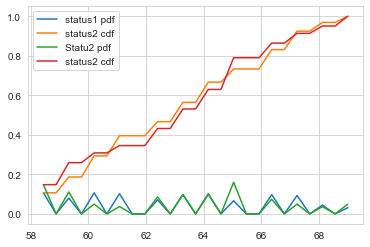

In [17]:
counts, bin_edges = np.histogram(status_1['Year_of_Operation'], bins=25, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='status1 pdf');
plt.plot(bin_edges[1:], cdf,label='status2 cdf')


counts, bin_edges = np.histogram(status_2['Year_of_Operation'], bins=25, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='Statu2 pdf');
plt.plot(bin_edges[1:], cdf,label='status2 cdf')
plt.legend()
plt.show()

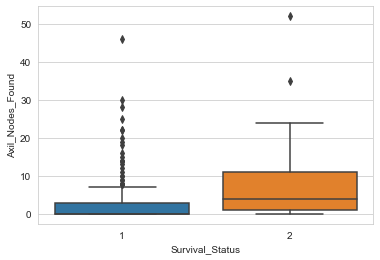

In [18]:
# Box plot
sns.boxplot(x='Survival_Status',y='Axil_Nodes_Found', data=df)
plt.show()

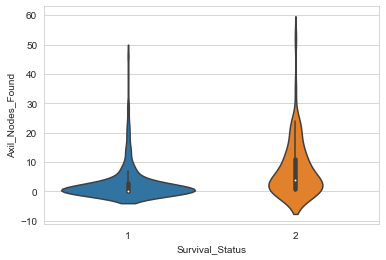

In [19]:
# Violin plot
sns.violinplot(x='Survival_Status',y='Axil_Nodes_Found', data=df, size=8)
plt.show()

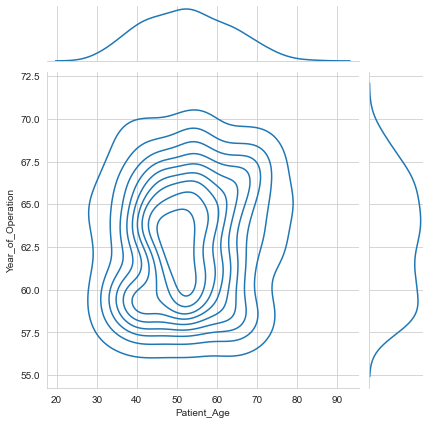

In [20]:
# Multi variant Analysis
sns.jointplot(x= 'Patient_Age',kind = 'kde', y='Year_of_Operation', data = df)
plt.show()

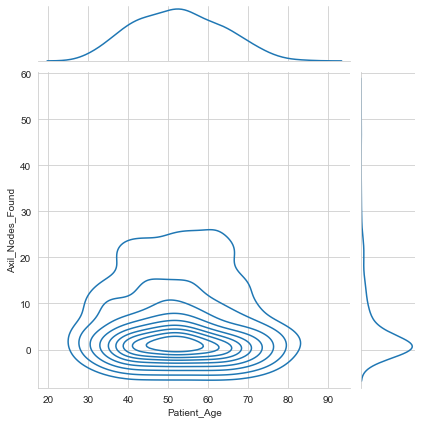

In [21]:
sns.jointplot(x= 'Patient_Age',kind = 'kde', y='Axil_Nodes_Found', data=df)
plt.show()

In [22]:
# Model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from matplotlib.ticker import FormatStrFormatter

In [23]:
# Train / Test data split

array = df.values
X = array[:,:3]
Y = array[:,3]
validation_size = 0.30
seed = 10
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, 
test_size=validation_size, random_state=seed)

In [24]:
# Test options and evaluation metric

num_folds = 20
num_instances = len(X_train)
seed = 10
scoring = 'accuracy'

In [25]:
# Make predictions on validation dataset
knn =  GaussianNB()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.782608695652174
[[66  6]
 [14  6]]
              precision    recall  f1-score   support

           1       0.82      0.92      0.87        72
           2       0.50      0.30      0.37        20

    accuracy                           0.78        92
   macro avg       0.66      0.61      0.62        92
weighted avg       0.75      0.78      0.76        92

